Loading Data Set

In [1]:
import pandas as pd
df = pd.read_csv("housing.csv")

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Cleaning

In [3]:
df = df.drop(columns=["ocean_proximity","longitude", "latitude"])
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [9]:
df["total_bedrooms"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [12]:
df.shape

(20640, 7)

In [13]:
df.dropna(subset=["total_bedrooms"], inplace=True)

In [14]:
df.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [21]:
df["total_rooms"].min()

np.float64(2.0)

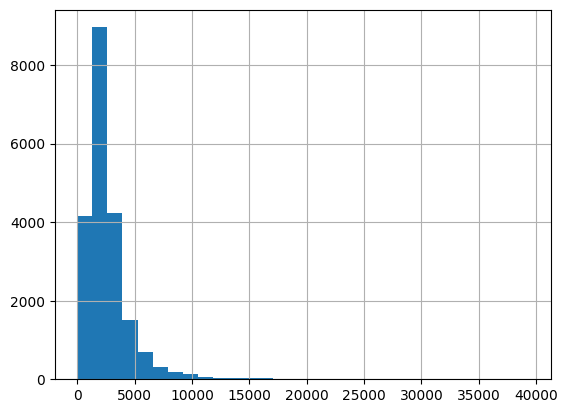

<Axes: >

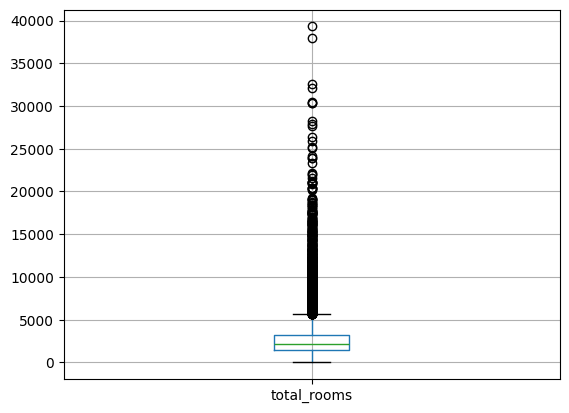

In [22]:
import matplotlib.pyplot as plt

# Histogram
df['total_rooms'].hist(bins=30)
plt.show()

# Boxplot
df.boxplot(column='total_rooms')


In [23]:
Q1 = df['total_rooms'].quantile(0.25)
Q3 = df['total_rooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Clean range:", lower_bound, "to", upper_bound)

Clean range: -1089.5 to 5682.5


In [25]:
rounded = round(df['total_rooms'].mean(),2)
df.loc[df["total_rooms"]<lower_bound, "total_rooms"] = rounded
df.loc[df["total_rooms"]>upper_bound, "total_rooms"] = rounded


In [35]:
Q1 = df['housing_median_age'].quantile(0.25)
Q3 = df['housing_median_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[df["housing_median_age"]<0, "housing_median_age"] = round(df['housing_median_age'].mean(),0)
df.loc[df["housing_median_age"]>upper_bound, "housing_median_age"] = round(df['housing_median_age'].mean(),0)

In [38]:
Q1 = df['total_bedrooms'].quantile(0.25)
Q3 = df['total_bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[df["total_bedrooms"]<lower_bound, "total_bedrooms"] = round(df['total_bedrooms'].mean(),0)
df.loc[df["total_bedrooms"]>upper_bound, "total_bedrooms"] = round(df['total_bedrooms'].mean(),0)

In [40]:
Q1 = df['population'].quantile(0.25)
Q3 = df['population'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[df["population"]<lower_bound, "population"] = round(df['population'].mean(),0)
df.loc[df["population"]>upper_bound, "population"] = round(df['population'].mean(),0)

In [43]:
df['households'].max()

np.float64(6082.0)

In [45]:
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[df["median_income"]<lower_bound, "median_income"] = round(df['median_income'].mean(),3)
df.loc[df["median_income"]>upper_bound, "median_income"] = round(df['median_income'].mean(),3)

In [46]:
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[df["median_house_value"]<lower_bound, "median_house_value"] = round(df['median_house_value'].mean(),0)
df.loc[df["median_house_value"]>upper_bound, "median_house_value"] = round(df['median_house_value'].mean(),0)

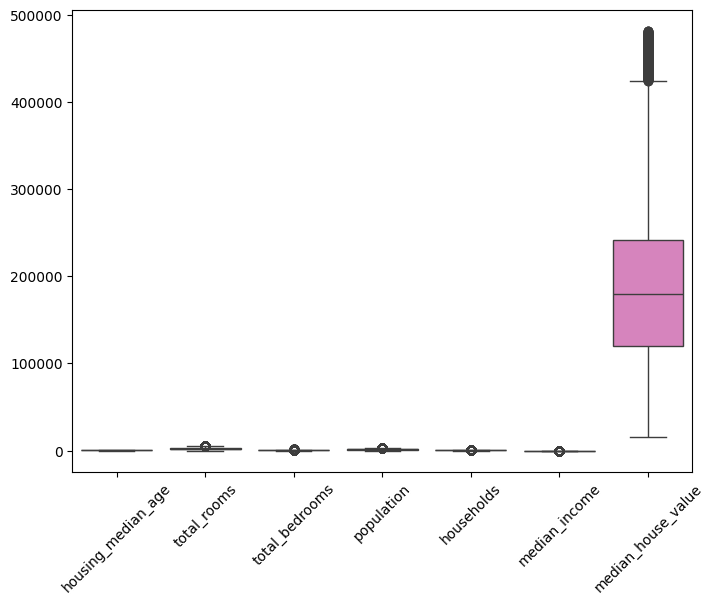

In [52]:
#looking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numeric columns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.show()

In [50]:
df.to_csv("cleaned_housing.csv", index=False)

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_clean = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers_clean.sum())  # Should be near 0

housing_median_age      0
total_rooms           583
total_bedrooms        593
population            577
households            611
median_income         246
median_house_value    429
dtype: int64


In [56]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2248.161944,463.007879,1236.916850,433.744629,3.665796,191638.452112
std,12.591805,1116.599700,230.062592,622.883831,214.913174,1.465452,92956.134748
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,2814.000000,579.000000,1557.000000,543.000000,4.548600,241300.000000
max,52.000000,5679.000000,1173.000000,3124.000000,1090.000000,8.014400,482200.000000
